In [1]:
import os
import numpy as np
os.chdir("..")

from utils.get_synthetic_data_for_validation import get_datasets
from utils.vm_helpers import save_dict_to_json
from utils.gcp_helpers import save_json_to_bucket
from models.CausalNex import CausalNexClass
import pandas as pd

%pwd

'/home/jupyter/crisp'

In [2]:
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

In [8]:
examples = ["Example1"]#, "Example2", "Example3", "Example4", "Example_Confounder", "Example_Nonlinear"]
n_seeds = 1
for example in examples:            
    results = {}
            
    for seed in range(n_seeds):
        print(example, ' seed ', int(seed))
        environment_datasets, val_dataset, test_dataset, config =  get_datasets(example, seed=seed)

        csnx = CausalNexClass(environment_datasets, val_dataset, test_dataset, {})
        results[seed] = csnx.results()
        results[seed]["seed"] = seed
            
#     result_file = "results/validation/CSNX_" + example + ".json"

#     save_dict_to_json(results, result_file)

Example1  seed  0
Environments variables: {'E0': 0.1, 'E1': 1.5, 'E2': 2, 'E3': 0.30815539086172433, 'E4': 2.016811860476012}
Generated Synthetic Data according to the Facebook setup Example: 1
     df with  62  columns
Environments variables: {'E0': 0.1, 'E1': 1.5, 'E2': 2, 'E3': 0.30815539086172433, 'E4': 2.016811860476012}
Generated Synthetic Data according to the Facebook setup Example: 1
     df with  62  columns
Running a per sample experiment
Using synthetic dataset train/test split
['Causal_0', 'Causal_1', 'Causal_2', 'Causal_3', 'Causal_4', 'Causal_5', 'Non_causal_0', 'Non_causal_1', 'Non_causal_2', 'Non_causal_3', 'Non_causal_4', 'Non_causal_5', 'Uncorrelated_0', 'Uncorrelated_1', 'Uncorrelated_2', 'Uncorrelated_3', 'Uncorrelated_4', 'Uncorrelated_5', 'Uncorrelated_6', 'Uncorrelated_7', 'Uncorrelated_8', 'Uncorrelated_9', 'Uncorrelated_10', 'Uncorrelated_11', 'Uncorrelated_12', 'Uncorrelated_13', 'Uncorrelated_14', 'Uncorrelated_15', 'Uncorrelated_16', 'Uncorrelated_17', 'Unc

In [9]:
ordered_names = results.get(0)["to_bucket"]['features']

In [10]:
coeffs = results.get(0)["to_bucket"]['coefficients']

In [11]:
original_names = test_dataset.predictor_columns

In [12]:
ordered_names

['Uncorrelated_12',
 'Causal_4',
 'Non_causal_2',
 'Causal_1',
 'Non_causal_5',
 'Non_causal_0',
 'Non_causal_3',
 'Causal_0',
 'Uncorrelated_0',
 'Uncorrelated_1',
 'Uncorrelated_39',
 'Uncorrelated_31',
 'Causal_5',
 'Uncorrelated_14',
 'Causal_3',
 'Non_causal_1',
 'Non_causal_4',
 'Uncorrelated_43',
 'Uncorrelated_26',
 'Uncorrelated_42',
 'Uncorrelated_35',
 'Uncorrelated_38',
 'Uncorrelated_32',
 'Uncorrelated_13',
 'Uncorrelated_2',
 'Uncorrelated_37',
 'Uncorrelated_33',
 'Uncorrelated_29',
 'Uncorrelated_40',
 'Uncorrelated_4',
 'Uncorrelated_22',
 'Uncorrelated_30',
 'Uncorrelated_44',
 'Uncorrelated_23',
 'Uncorrelated_11',
 'Uncorrelated_18',
 'Uncorrelated_21',
 'Uncorrelated_19',
 'Causal_2',
 'Uncorrelated_27',
 'Uncorrelated_7',
 'Uncorrelated_45',
 'Uncorrelated_46',
 'Uncorrelated_9',
 'Uncorrelated_16',
 'Uncorrelated_34',
 'Uncorrelated_48',
 'Uncorrelated_24',
 'Uncorrelated_5',
 'Uncorrelated_41',
 'Uncorrelated_10',
 'Uncorrelated_8',
 'Uncorrelated_15',
 'Uncorr

In [13]:
bool_names = []
for original_name in original_names:
    if original_name in ordered_names[:10]:
        bool_names.append(True)
    else:
        bool_names.append(False)

In [14]:
# from itertools import compress
# first_ten = list(compress(original_names,bool_names))
# from itertools import chain, combinations, compress
# import numpy as np
# import torch
# from scipy.stats import f as fdist
# from scipy.stats import ttest_ind

# from models.TorchModelZoo import TorchLinearRegressionModule, TorchLogisticRegressionModule
# from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
# import pickle

In [15]:
from utils.p_values_invariance import computing_p_values, euristic_ICP

In [16]:
p_vals = computing_p_values(ordered_names, original_names, environment_datasets, first_n_elems = 62)

0.016129032258064516
0.03225806451612903
0.04838709677419355
0.06451612903225806
0.08064516129032258
0.0967741935483871
0.11290322580645161
0.12903225806451613
0.14516129032258066
0.16129032258064516
0.1774193548387097
0.1935483870967742
0.20967741935483872
0.22580645161290322
0.24193548387096775
0.25806451612903225
0.27419354838709675
0.2903225806451613
0.3064516129032258
0.3225806451612903
0.3387096774193548
0.3548387096774194
0.3709677419354839
0.3870967741935484
0.4032258064516129
0.41935483870967744
0.43548387096774194
0.45161290322580644
0.46774193548387094
0.4838709677419355
0.5
0.5161290322580645
0.532258064516129
0.5483870967741935
0.5645161290322581
0.5806451612903226
0.5967741935483871
0.6129032258064516
0.6290322580645161
0.6451612903225806
0.6612903225806451
0.6774193548387096
0.6935483870967742
0.7096774193548387
0.7258064516129032
0.7419354838709677
0.7580645161290323
0.7741935483870968
0.7903225806451613
0.8064516129032258
0.8225806451612904
0.8387096774193549
0.8548387

In [17]:
import matplotlib.pyplot as plt


In [18]:
CDFs = []
Causal_of_selected = []
count = 0
for j in range(1,len(p_vals)):
    if 'Causal' in ordered_names[j]:
        count+=1
    CDFs.append(count)
    Causal_of_selected.append(CDFs[-1]/j)

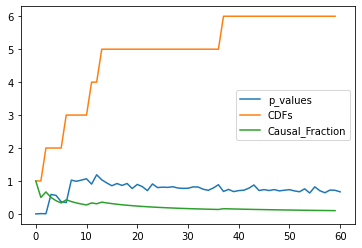

In [19]:
plt.plot(p_vals, label='p_values')
plt.plot(CDFs, label='CDFs')
plt.plot(Causal_of_selected, label='Causal_Fraction')
plt.legend()

In [27]:
 from utils.gcp_helpers import save_json_to_bucket, get_json_from_bucket

In [26]:
save_json_to_bucket(CDFs, "test/test_CFDs.json","ah21_data","ah21_data")

1

In [28]:
CDFs_2 = get_json_from_bucket("test/test_CFDs.json","ah21_data","ah21_data")

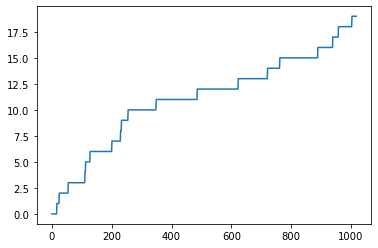

In [29]:
plt.plot(CDFs_2)

In [26]:
p_vals_ideal = computing_p_values(original_names, original_names, environment_datasets, first_n_elems = 62)

0.016129032258064516
0.03225806451612903
0.04838709677419355
0.06451612903225806
0.08064516129032258
0.0967741935483871
0.11290322580645161
0.12903225806451613
0.14516129032258066
0.16129032258064516
0.1774193548387097
0.1935483870967742
0.20967741935483872
0.22580645161290322
0.24193548387096775
0.25806451612903225
0.27419354838709675
0.2903225806451613
0.3064516129032258
0.3225806451612903
0.3387096774193548
0.3548387096774194
0.3709677419354839
0.3870967741935484
0.4032258064516129
0.41935483870967744
0.43548387096774194
0.45161290322580644
0.46774193548387094
0.4838709677419355
0.5
0.5161290322580645
0.532258064516129
0.5483870967741935
0.5645161290322581
0.5806451612903226
0.5967741935483871
0.6129032258064516
0.6290322580645161
0.6451612903225806
0.6612903225806451
0.6774193548387096
0.6935483870967742
0.7096774193548387
0.7258064516129032
0.7419354838709677
0.7580645161290323
0.7741935483870968
0.7903225806451613
0.8064516129032258
0.8225806451612904
0.8387096774193549
0.8548387

In [29]:
p_vals_ideal

[4.270686981833194e-07,
 0.0008870085089252022,
 0.0009080548859063953,
 0.0023324620166387255,
 1.2141235847106473,
 1.2287717925443233,
 1.1286093072035488,
 1.0007747395496116,
 0.949463103215523,
 0.8800784086325582,
 0.8924964587418753,
 0.8654274312361588,
 0.8371336800647791,
 0.8403953299619981,
 0.8225677852131202,
 0.8281988886828541,
 0.9460919655217799,
 0.9467781905653292,
 0.8430002219815877,
 0.7517781284966213,
 0.796457747658442,
 0.8513102379126082,
 0.8360614706403435,
 0.8334407426262035,
 0.811631845007219,
 0.869710815736478,
 0.7619877047300295,
 0.7887476889400137,
 0.7769709868630585,
 0.8344341032617963,
 0.8241277658533823,
 0.7062662833844312,
 0.8063641498739338,
 0.830852741655415,
 0.8472186029248026,
 0.8215048984461866,
 0.7268921294818819,
 0.8328303051536444,
 0.850390027835516,
 0.7998389682188911,
 0.9714418234096038,
 0.8512714302928257,
 0.8049554927424046,
 0.8476284967936933,
 0.8374754616559958,
 0.7206824316099302,
 0.7080509963347765,
 0.6593

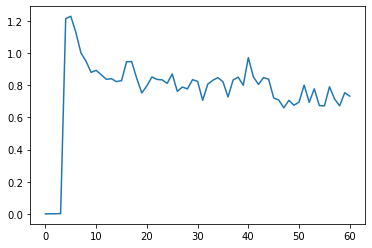

In [27]:
plt.plot(p_vals_ideal)

In [30]:
eICP = euristic_ICP(original_names, original_names, environment_datasets, first_n_elems=50)

0.0
0.016129032258064516
0.03225806451612903
0.04838709677419355
0.06451612903225806
0.08064516129032258
0.0967741935483871
0.11290322580645161
0.12903225806451613
0.14516129032258066
0.16129032258064516
0.1774193548387097
0.1935483870967742
0.20967741935483872
0.22580645161290322
0.24193548387096775
0.25806451612903225
0.27419354838709675
0.2903225806451613
0.3064516129032258
0.3225806451612903
0.3387096774193548
0.3548387096774194
0.3709677419354839
0.3870967741935484
0.4032258064516129
0.41935483870967744
0.43548387096774194
0.45161290322580644
0.46774193548387094
0.4838709677419355
0.5
0.5161290322580645
0.532258064516129
0.5483870967741935
0.5645161290322581
0.5806451612903226
0.5967741935483871
0.6129032258064516
0.6290322580645161
0.6451612903225806
0.6612903225806451
0.6774193548387096
0.6935483870967742
0.7096774193548387
0.7258064516129032
0.7419354838709677
0.7580645161290323
0.7741935483870968
0.7903225806451613


In [31]:
len(eICP)

13

In [32]:
eICP

['Causal_0',
 'Causal_1',
 'Causal_2',
 'Causal_3',
 'Causal_4',
 'Causal_5',
 'Non_causal_4',
 'Uncorrelated_0',
 'Uncorrelated_1',
 'Uncorrelated_4',
 'Uncorrelated_6',
 'Uncorrelated_15',
 'Uncorrelated_29']

In [24]:
ordered_names

['Uncorrelated_12',
 'Causal_4',
 'Non_causal_2',
 'Causal_1',
 'Non_causal_5',
 'Non_causal_0',
 'Non_causal_3',
 'Causal_0',
 'Uncorrelated_0',
 'Uncorrelated_1',
 'Uncorrelated_39',
 'Uncorrelated_31',
 'Causal_5',
 'Uncorrelated_14',
 'Causal_3',
 'Non_causal_1',
 'Non_causal_4',
 'Uncorrelated_43',
 'Uncorrelated_26',
 'Uncorrelated_42',
 'Uncorrelated_35',
 'Uncorrelated_38',
 'Uncorrelated_32',
 'Uncorrelated_13',
 'Uncorrelated_2',
 'Uncorrelated_37',
 'Uncorrelated_33',
 'Uncorrelated_29',
 'Uncorrelated_40',
 'Uncorrelated_4',
 'Uncorrelated_22',
 'Uncorrelated_30',
 'Uncorrelated_44',
 'Uncorrelated_23',
 'Uncorrelated_11',
 'Uncorrelated_18',
 'Uncorrelated_21',
 'Uncorrelated_19',
 'Causal_2',
 'Uncorrelated_27',
 'Uncorrelated_7',
 'Uncorrelated_45',
 'Uncorrelated_46',
 'Uncorrelated_9',
 'Uncorrelated_16',
 'Uncorrelated_34',
 'Uncorrelated_48',
 'Uncorrelated_24',
 'Uncorrelated_5',
 'Uncorrelated_41',
 'Uncorrelated_10',
 'Uncorrelated_8',
 'Uncorrelated_15',
 'Uncorr